In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [30]:
try:
    data = pd.read_csv('complete.csv')
except pd.errors.ParserError:
    # If there is a parsing error, display a message and skip the row causing the error
    print("Error: Parsing issue in some rows. Skipping problematic rows.")
    data = pd.read_csv('complete.csv', on_bad_lines=lambda x: x[:-1], engine='python')


Error: Parsing issue in some rows. Skipping problematic rows.


In [31]:
state_counts = data['state'].value_counts()
print(state_counts)

state
ca    10450
wa     4653
fl     4598
tx     4050
ny     3511
      ...  
nt       23
pe       23
yt       14
yk        7
vi        1
Name: count, Length: 68, dtype: int64


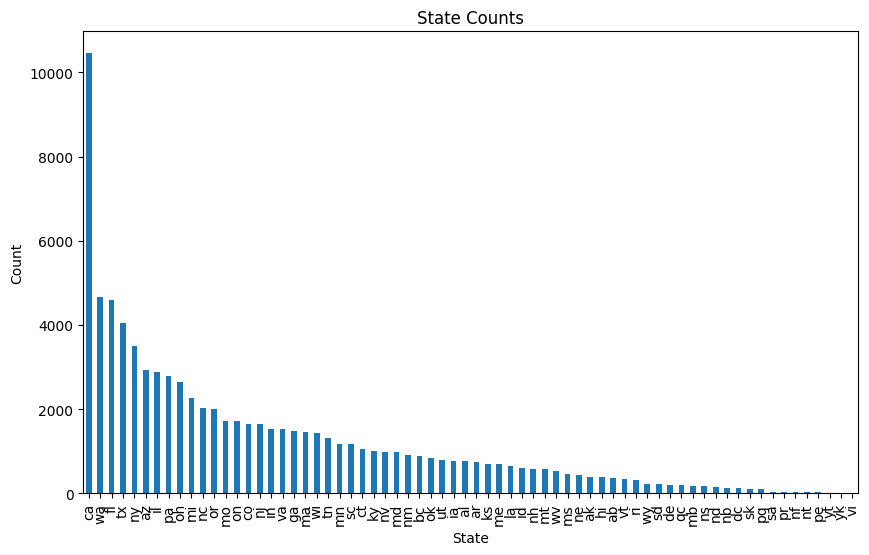

In [42]:
state_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('State')
plt.ylabel('Count')
plt.title('State Counts')
plt.savefig('state_counts.png')
plt.show()

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude', 'year', 'month'],
      dtype='object')


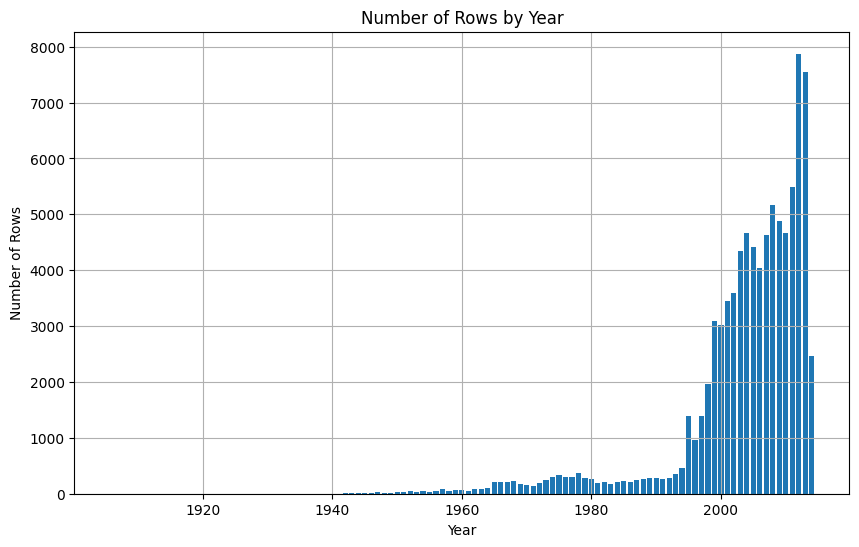

In [41]:
data['datetime'] = pd.to_datetime(data['datetime'], format='%m/%d/%Y %H:%M', errors='coerce')

# Extract the year from the datetime column
data['year'] = data['datetime'].dt.year


print(data.columns)
# Group the data by year and perform the desired aggregation (e.g., count, sum, etc.)
data_by_year = data.groupby('year').size().reset_index(name='count')

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(data_by_year['year'], data_by_year['count'])
plt.xlabel('Year')
plt.ylabel('Number of Rows')
plt.title('Number of Rows by Year')
plt.grid(True)
plt.savefig('Number_of_Rows_by_Year.png')
plt.show()

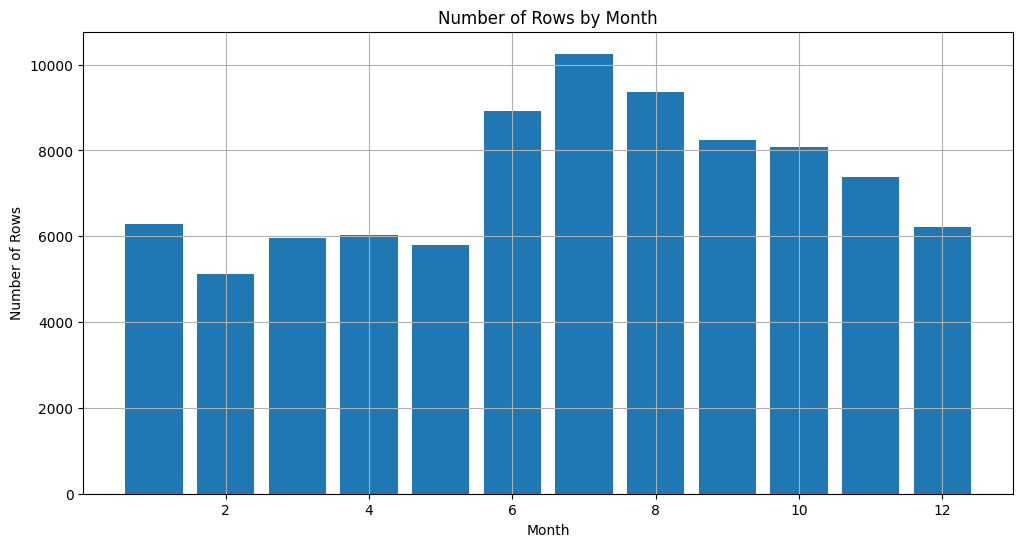

In [40]:
data['datetime'] = pd.to_datetime(data['datetime'], format='%m/%d/%Y %H:%M', errors='coerce')

# Extract the year from the datetime column
data['month'] = data['datetime'].dt.month

# Group the data by year and perform the desired aggregation (e.g., count, sum, etc.)
data_by_year = data.groupby('month').size().reset_index(name='count')

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(data_by_year['month'], data_by_year['count'])
plt.xlabel('Month')
plt.ylabel('Number of Rows')
plt.title('Number of Rows by Month')
plt.savefig('Number_of_Rows_by_Month.png')
plt.grid(True)

plt.show()

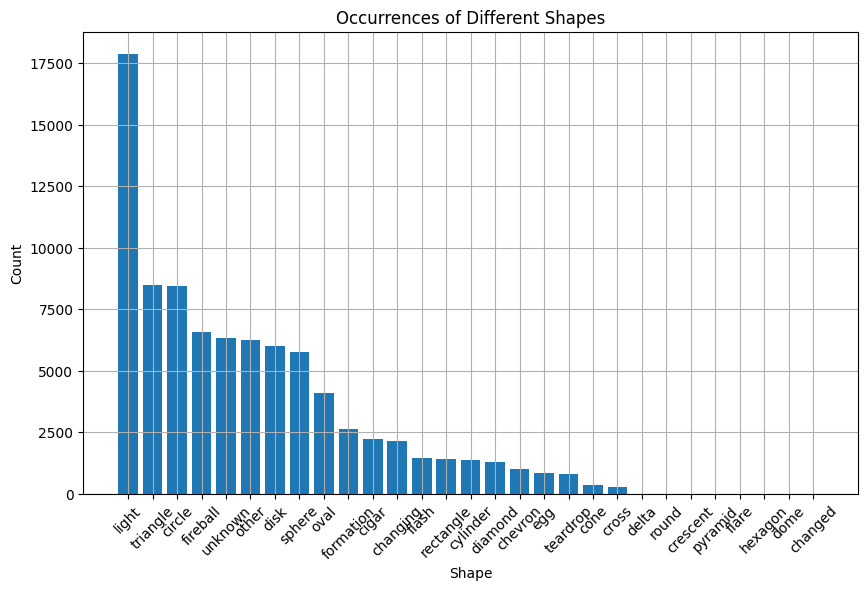

In [37]:
shape_counts_df = data['shape'].value_counts()

shape_counts_df = shape_counts.reset_index()
shape_counts_df.columns = ['shape', 'count']

# print(shape_counts_df)

plt.figure(figsize=(10, 6))
plt.bar(shape_counts_df['shape'], shape_counts_df['count'])
plt.xlabel('Shape')
plt.ylabel('Count')
plt.title('Occurrences of Different Shapes')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('Occurrences_of_Different_Shapes.png')
plt.show()


In [8]:
latitude = data['latitude']
longitude = data['longitude']


/var/folders/wz/wdfk34nj63sds6m2z08s4_9r0000gn/T/ipykernel_4200/2599919472.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


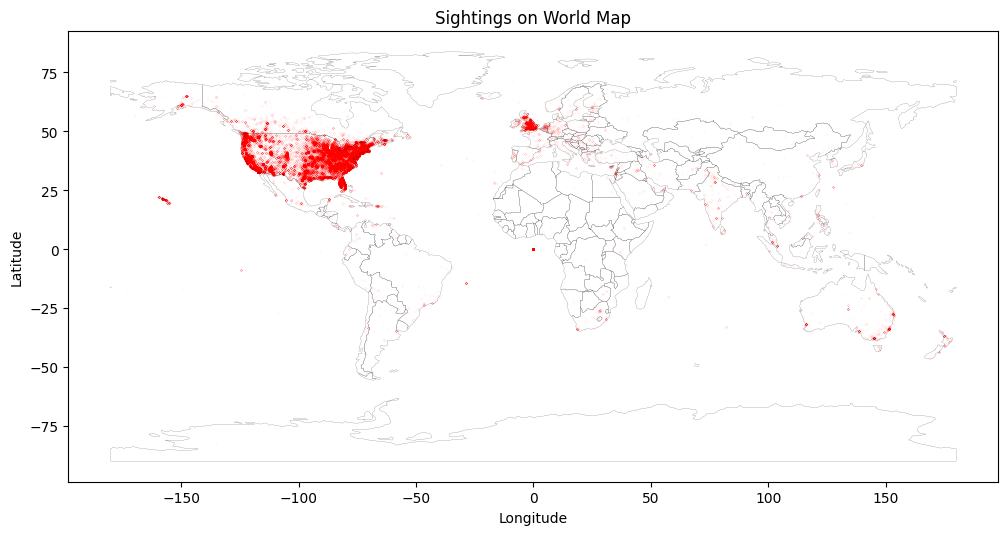

In [25]:
from shapely.geometry import Point
# Create a DataFrame with random locations
# data = pd.DataFrame({'latitude': latitude, 'longitude': longitude})
data['latitude'] = pd.to_numeric(data.latitude, errors='coerce')
data['longitude'] = pd.to_numeric(data.longitude, errors='coerce')

# Convert the DataFrame to a GeoDataFrame
df = data.dropna(subset=['latitude', 'longitude'])

# Convert the DataFrame to a GeoDataFrame
geometry = [Point(lon, lat) for lon, lat in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")
# Load a world map shapefile (you can find shapefiles for different regions online)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map and the data points
fig, ax = plt.subplots(figsize=(12, 8))
world.boundary.plot(ax=ax, linewidth=0.1, color='black')
gdf.plot(ax=ax, markersize=.001, color='red', alpha=0.7, marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sightings on World Map')
plt.savefig('Sightings_on_the_World_Map.png')
plt.show()

